In [112]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

In [ ]:
# Find out the principle components for the iris dataset 

In [113]:
iris = sns.load_dataset("iris")
list(iris)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [114]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [115]:
# Convert the values in the "species" column to numerical
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [116]:
# Convert data to numpy arrays
X = pd.DataFrame.as_matrix(iris[['sepal_length','sepal_width','petal_length','petal_width']])
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [117]:
X = scale(X) # normalization

In [118]:
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [119]:
pca = PCA(n_components=4)

In [120]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [121]:
var = pca.explained_variance_ratio_

In [122]:
var

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

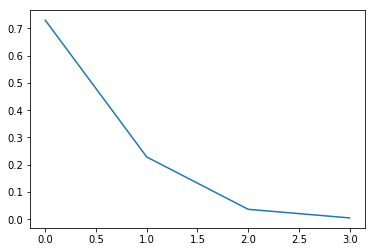

In [123]:
plt.plot(var)

In [124]:
# Cumulative variance explains
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

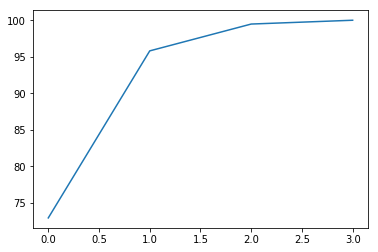

In [125]:
plt.plot(var1)

In [126]:
x_pca = pca.transform(X)
print type(x_pca)
x_pca_4d = pd.DataFrame(x_pca)
print type(x_pca_4d)

<type 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [127]:
x_pca_4d.columns = ['PC1','PC2','PC3','PC4']
x_pca_4d.head(5)

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


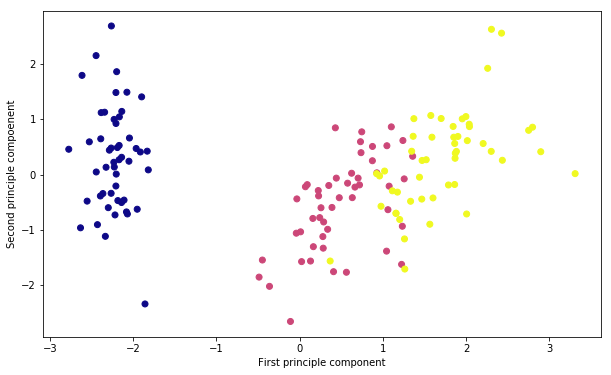

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = iris.species[:], cmap = 'plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoenent')

plt.show()